This will enable you to access any directory on your Drive inside the Colab notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Unzipping the data
Next, we will download and unzip Apache Spark with Hadoop 3.2 to install it.

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz


In [ ]:
!tar xf spark-3.2.0-bin-hadoop3.2.tgz


# Installing and importing the `‘findspark’` library that will locate Spark on the system and import it as a regular library.



In [ ]:
!pip install -q findspark


#### Now, it’s time to set the `‘environment’` path

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()



In [ ]:
findspark.find()

'/content/spark-3.2.0-bin-hadoop3.2'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()


In [ ]:
spark

Given a Dataframe "D1" has a column "I1" with JSON values. We need to add additional columns in the Dataframe based on the keys of the JSON values of the given column "I1". The condition of adding the new columns is this;
- We need to add a column whenever we see a new key in the JSON values of our given
For eg - Given Initial Dataframe "D1"

     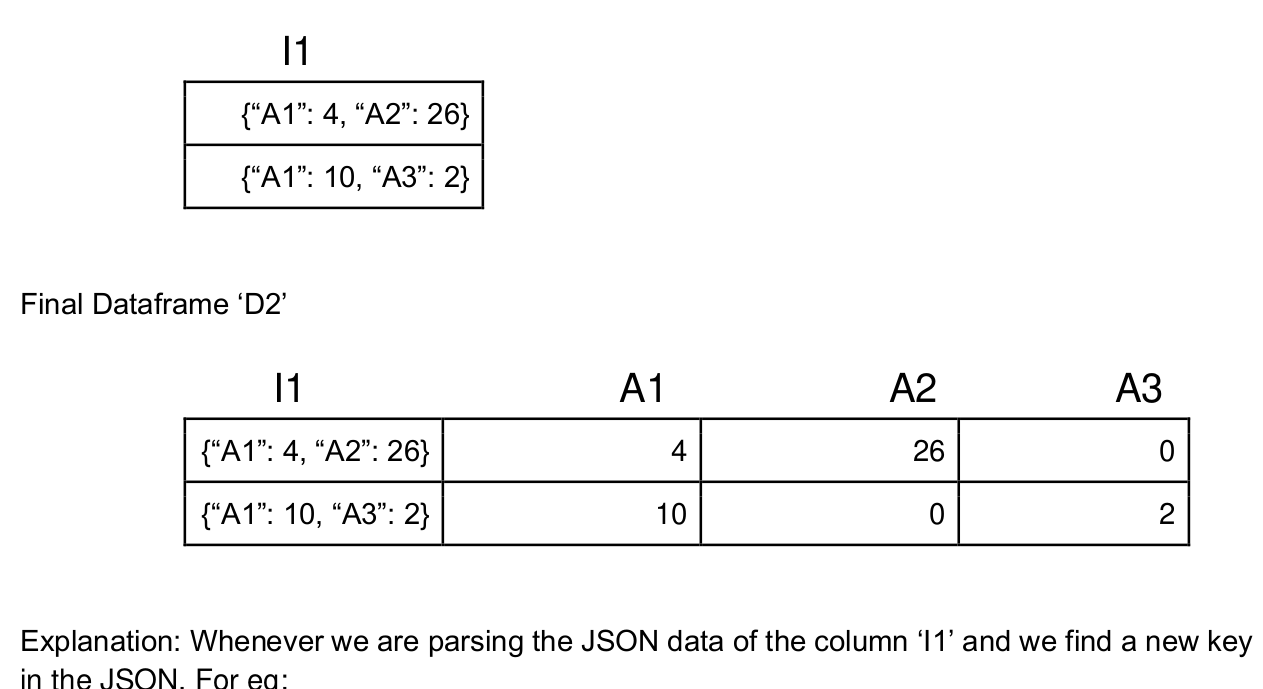

- In the first row, we found two keys ‘A1’, ‘A2’ in the JSON so we need to create two new columns ‘A1’, ‘A2’ in the Dataframe - the values of these new columns as you can see are taken from the JSON itself.
- In the second row, we found two keys ‘A1’, ‘A3’ in the JSON. ‘A1’ is already present so we just create one new column ‘A3’.

NOTE:
- The default value of a column is 0 in case there is no key: value present in the JSON.
- Please make your code as generic as possible, a JSON value could contain any key: value pairs, the above case is only given as an example. The code should be able to take any Dataframe with JSON value and should be able to flatten the data in the above format.














In [ ]:

from pyspark.sql.types import MapType,StringType
from pyspark.sql.functions import from_json



In [ ]:

from pyspark.sql import SparkSession,Row
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
data = ['''{"A1": 4, "A2": 26}''','''{"A1":10,"A3":2}''']
columns = ["I1"]
df = spark.createDataFrame(data,"string").toDF("I1")
df.show()





+-------------------+
|                 I1|
+-------------------+
|{"A1": 4, "A2": 26}|
|   {"A1":10,"A3":2}|
+-------------------+



In [ ]:
data_collect = df.collect()
import ast
from pyspark.sql.functions import lit
for row in data_collect:
    r=ast.literal_eval(row['I1'])
    keys=['I1']
    values=[row['I1']]
    for key in r:
      if key not in df.columns:
        df=df.withColumn(key,lit(None))
      keys.append(key)
      values.append(r[key])
    df=df.where(df.I1 != row['I1'])
    newRow=spark.createDataFrame([values],keys)
    df=df.unionByName(newRow,allowMissingColumns=True)
df.show()




+-------------------+---+----+----+
|                 I1| A1|  A2|  A3|
+-------------------+---+----+----+
|{"A1": 4, "A2": 26}|  4|  26|null|
|   {"A1":10,"A3":2}| 10|null|   2|
+-------------------+---+----+----+

